In [2]:
import pandas as pd # 导入Pandas
import numpy as np # 导入NumPy
dir_train = 'reviews.csv'
df_train = pd.read_csv(dir_train) # 读入训练集
df_train.head() # 输出部分数据

,id,Review Text,Rating
0,0,Absolutely wonderful - silky and comfortable,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
X_train_lst = df_train["Review Text"].values # 将评论读入张量(训练集)
y_train = df_train["Rating"].values # 构建标签集
dictionary_size = 20000 # 设定词典的大小
tokenizer = Tokenizer(num_words=dictionary_size) # 初始化词典
tokenizer.fit_on_texts( X_train_lst ) # 使用训练集创建词典索引
# 为所有的单词分配索引值，完成分词工作
X_train_tokenized_lst = tokenizer.texts_to_sequences(X_train_lst)

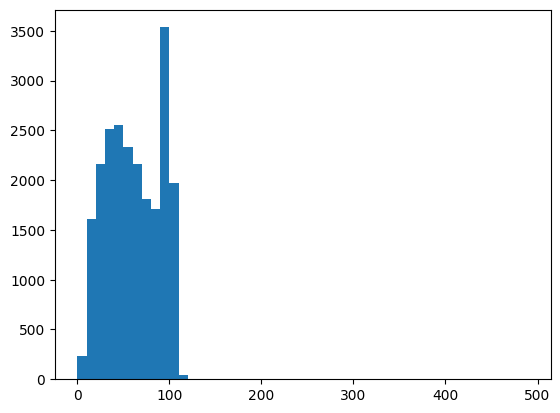

In [4]:
import matplotlib.pyplot as plt # 导入matplotlib
word_per_comment = [len(comment) for comment in X_train_tokenized_lst]
plt.hist(word_per_comment, bins = np.arange(0,500,10)) # 显示评论长度分布
plt.show()
# 下图中的评论长度分布情况表明多数评论的词数载120以内，所以我们只需要处理前120个词，就能够判定绝大多数评论的类型。
# 如果这个数目太大，那么将来构造出的词嵌入张量就达不到密集矩阵的效果。而且，词数太长的序列，Simple RNN处理起来效果也不好。

In [5]:
# 下面的padding_sequence方法会把数据截取成相同的长度。如果长度大于120，将被截断；如果长度小于120，将填充无意义的0值
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_comment_length = 100 # 设定评论输入长度为100，并填充默认值(如字数少于100)
X_train = pad_sequences(X_train_tokenized_lst, maxlen=max_comment_length)

In [11]:
from tensorflow.keras.models import Sequential # 导入贯序模型
from tensorflow.keras.layers import Embedding #导入词嵌入层
from tensorflow.keras.layers import Dense #导入全连接层
from tensorflow.keras.layers import SimpleRNN #导入SimpleRNN层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
rnn = Sequential() # 贯序模型
rnn.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
rnn.add(SimpleRNN(100)) # 加入SimpleRNN层
rnn.add(Dense(10, activation='relu')) # 加入全连接层
rnn.add(Dense(6, activation='softmax')) # 加入分类输出层
rnn.compile(loss='sparse_categorical_crossentropy', #损失函数
            optimizer='adam', # 优化器
            metrics=['acc']) # 评估指标
print(rnn.summary()) #打印网络模型

/Users/huke/machine-learning-demos/venv2405/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
history = rnn.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs=10, 
                    batch_size=64)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.5415 - loss: 1.2803 - val_acc: 0.5541 - val_loss: 1.1786
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.5943 - loss: 1.0486 - val_acc: 0.5790 - val_loss: 1.0409
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.6706 - loss: 0.8166 - val_acc: 0.5737 - val_loss: 1.1035
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.7467 - loss: 0.6525 - val_acc: 0.5251 - val_loss: 1.2154
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.8261 - loss: 0.4662 - val_acc: 0.5345 - val_loss: 1.3321
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.8790 - loss: 0.3471 - val_acc: 0.4859 - val_loss: 1.6204
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.9242 - loss: 0.2320 - val_acc: 0.5336 - val_loss: 1.7598
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.9450 - loss: 0.1702 - val_acc: 0.5189 - val_loss: 1.9798
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/

In [7]:
# LSTM解决的是循环层与神经元层内循环处理过程中的信息消失问题
from tensorflow.keras.models import Sequential # 导入贯序模型
from tensorflow.keras.layers import Embedding #导入词嵌入层
from tensorflow.keras.layers import Dense #导入全连接层
from tensorflow.keras.layers import LSTM #导入LSTM层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
rnn = Sequential() # 贯序模型
rnn.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
rnn.add(LSTM(100)) # 加入SimpleRNN层
rnn.add(Dense(10, activation='relu')) # 加入全连接层
rnn.add(Dense(6, activation='softmax')) # 加入分类输出层
rnn.compile(loss='sparse_categorical_crossentropy', #损失函数
            optimizer='adam', # 优化器
            metrics=['acc']) # 评估指标
history = rnn.fit(X_train, y_train, 
                    validation_split = 0.3,
                    epochs=10, 
                    batch_size=64)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - acc: 0.5494 - loss: 1.5146 - val_acc: 0.5999 - val_loss: 0.9888
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - acc: 0.6423 - loss: 0.8838 - val_acc: 0.6130 - val_loss: 0.9188
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - acc: 0.6638 - loss: 0.8054 - val_acc: 0.6064 - val_loss: 0.9302
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - acc: 0.6992 - loss: 0.7260 - val_acc: 0.6170 - val_loss: 0.9342
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - acc: 0.7309 - loss: 0.6552 - val_acc: 0.6055 - val_loss: 0.9771
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - acc: 0.7563 - loss: 0.6038 - val_acc: 0.6028 - val_loss: 1.0307
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - acc: 0.7934 - loss: 0.5336 - val_acc: 0.5778 - val_loss: 1.0623
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - acc: 0.8229 - loss: 0.4732 - val_acc: 0.5887 - val_loss: 1.1170
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 